In [1]:
import sys, os
import numpy as np
import xarray as xr
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt
# plot styles/formatting
import cmocean.cm as cmo
import cmocean
# cartopy
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import cartopy.feature as cfeature

# Path to modules
sys.path.append('../modules/')
import globalvars
from wrf_utils import load_preprocessed_WRF_data
from plotter import plot_trend_with_clim
from xarrayMannKendall import compute_MK_trend_da

model = 'cfsr'
path_to_data = globalvars.path_to_data
varname = 'freezing_level'

# # load data
ds = load_preprocessed_WRF_data(model, varname, anomaly=False)

## compute 95th percentile for var for each year
ds = ds.groupby("time.year").quantile(0.95, dim="time").rename(year="time")

## get clim of 95th percentile
ds_clim = ds.mean('time')
ds_clim


<xarray.Dataset> Size: 1MB
Dimensions:         (y: 250, x: 320)
Coordinates:
    lat             (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    lon             (y, x) float32 320kB dask.array<chunksize=(250, 320), meta=np.ndarray>
    quantile        float64 8B 0.95
Dimensions without coordinates: y, x
Data variables:
    freezing_level  (y, x) float64 640kB dask.array<chunksize=(250, 320), meta=np.ndarray>

In [2]:
# --- add units to clim ---
# ds_clim['uv'].attrs['units'] = 'm s$^{-1}$'
# ds_clim['ivt'].attrs['units'] = 'kg m$^{-1}$ s$^{-1}$'
# ds_clim['pcpt'].attrs['units'] = 'mm day$^{-1}$'
ds_clim['freezing_level'].attrs['units'] = 'm'

In [3]:
 print(f'Minimum: {np.nanmin(ds_clim['freezing_level'].values)}, Maximum: {np.nanmax(ds_clim['freezing_level'].values)}')

Minimum: 2889.1579425048826, Maximum: 3840.984990234375


Minimum % change: 2.9775458814452005, Maximum % change: 10.573673706580792


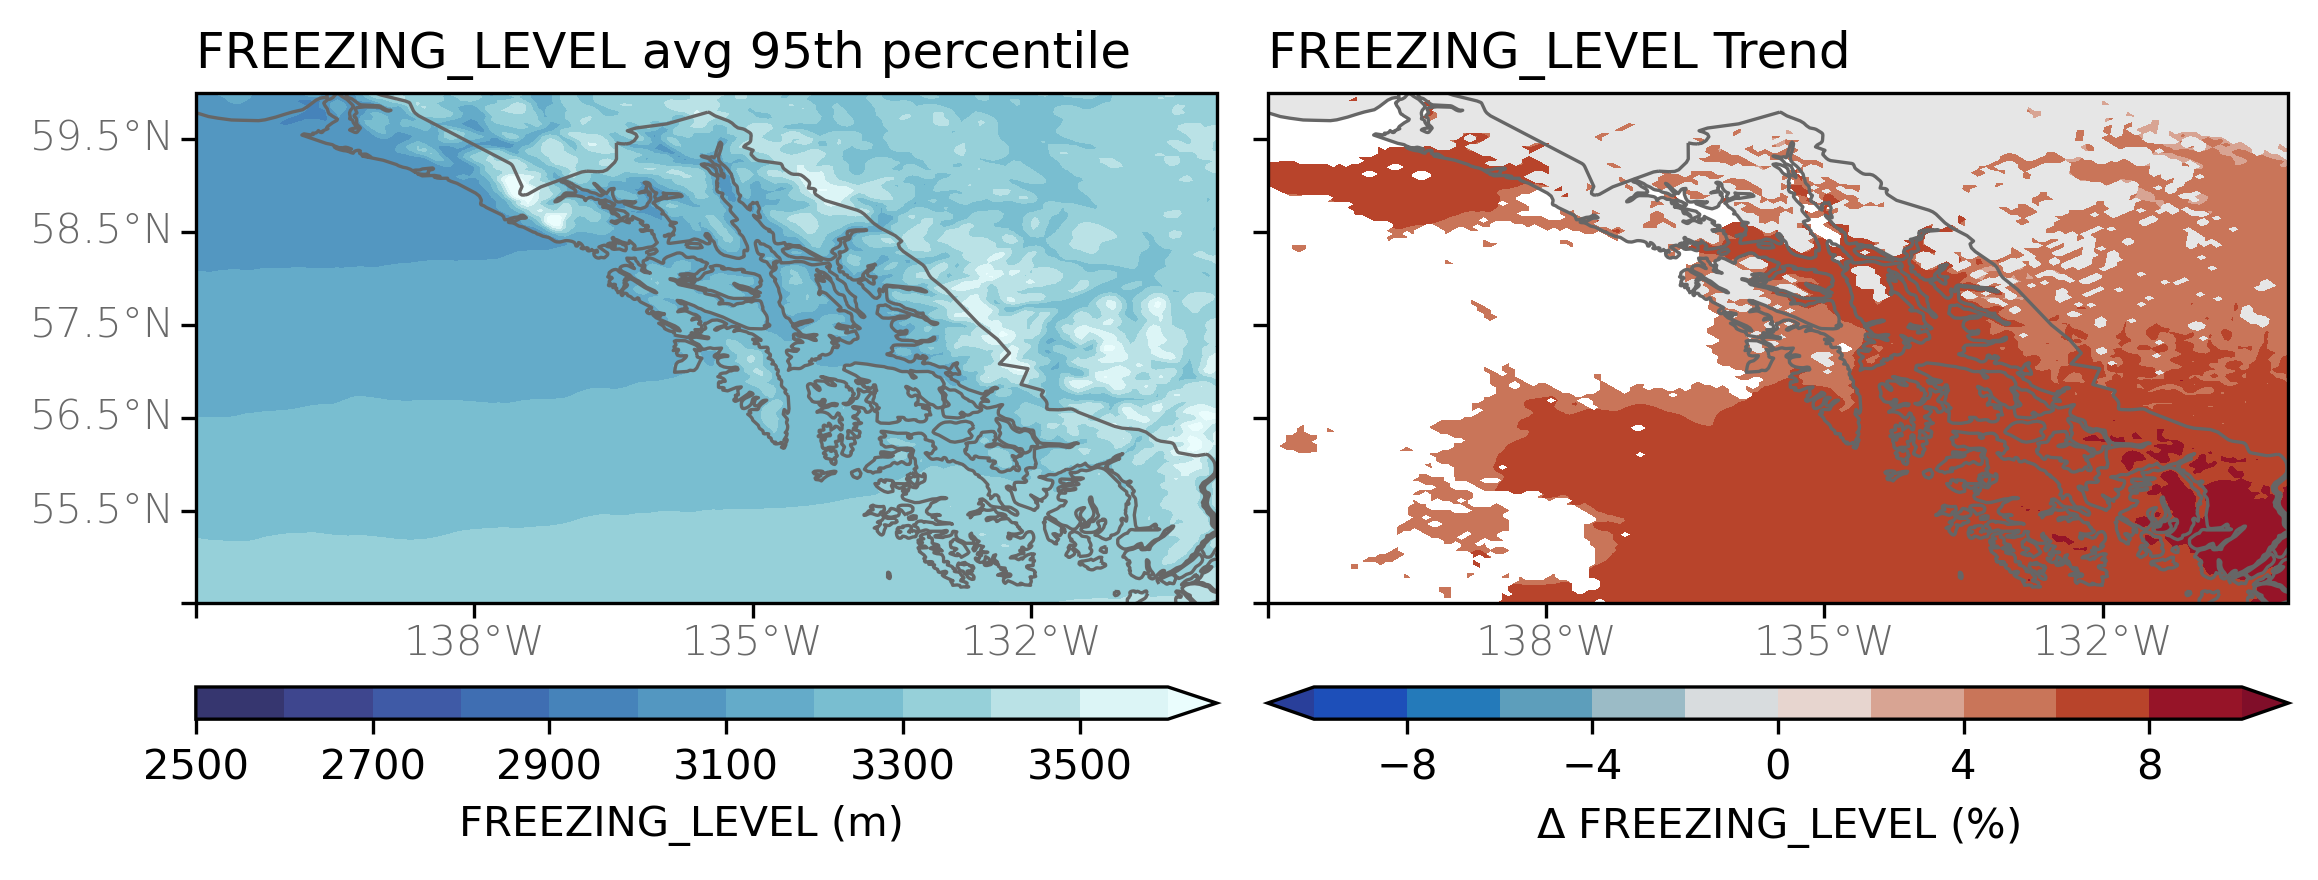

In [4]:
# Data for plotting
lons = ds.lon.values
lats = ds.lat.values

if varname == 'uv925':
    varname = 'uv'
else:
    varname = varname
    
fname = os.path.join(path_to_data, f"preprocessed/SEAK-WRF/{model}/trends/{varname}_{model}_trends.nc")
ds = xr.open_dataset(fname)


plot_trend_with_clim(ds, ds_clim, varname, lons, lats, model,
                         lonmin=-141., lonmax=-130., latmin=54.5, latmax=60.,
                         sig_level=0.2)